<a href="https://colab.research.google.com/github/sejongsmarcle/2023_Spring_Kaggle_Study/blob/main/week1/3%ED%8C%80/%EC%A0%95%EC%9C%A0%EC%A0%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 영화 관객 수 데이터를 활용한 데이터 분석

감독, 이름, 상영등급, 스태프 수 등의 정보로 영화 관객 수를 예측하는 모델을 만들어 주세요!

## 1. 라이브러리 및 데이터
## Library & Data

In [4]:
#판다스 패키지 불러오기
import pandas as pd
import lightgbm as lgb

In [5]:
#데이터 불러오기
train = pd.read_csv('/content/KaggleStudy_Data/movies_train.csv')
test = pd.read_csv('/content/KaggleStudy_Data/movies_test.csv')
submission = pd.read_csv('/content/KaggleStudy_Data/submission.csv')

## 2. 탐색적 자료분석
## Exploratory Data Analysis (EDA)


### pd.DataFrame.head()
 - 데이터 프레임의 위에서 부터 n개 행을 보여주는 함수
 - n의 기본 값(default 값)은 5

In [18]:
#head() : 상위 행 보여줌
train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


+ title : 영화의 제목
+ distributor : 배급사
+ genre : 장르
+ release_time : 개봉일
+ time : 상영시간(분)
+ screening_rat : 상영등급
+ director : 감독이름
+ dir_prev_bfnum : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수(단 관객수가 알려지지 않은 영화 제외)
+ dir_prev_num : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화의 개수(단 관객수가 알려지지 않은 영화 제외)
+ num_staff : 스텝수
+ num_actor : 주연배우수
+ box_off_num : 관객수

In [20]:
test.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,3.005290e+05,2,304,3
1,아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,3.427002e+05,4,275,3
2,하모니,CJ 엔터테인먼트,드라마,2010-01-28,115,12세 관람가,강대규,4.206611e+06,3,419,7
3,의형제,(주)쇼박스,액션,2010-02-04,116,15세 관람가,장훈,6.913420e+05,2,408,2
4,평행 이론,CJ 엔터테인먼트,공포,2010-02-18,110,15세 관람가,권호영,3.173800e+04,1,380,1


In [21]:
submission.head()

,title,box_off_num
0,용서는 없다,0
1,아빠가 여자를 좋아해,0
2,하모니,0
3,의형제,0
4,평행 이론,0


### pd.DataFrame.tail()
 - 데이터 프레임의 아래에서 부터 n개 행을 보여주는 함수
 - n의 기본 값(default 값)은 5

In [19]:
#tail() : 하위 행 보여줌
train.tail()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
595,해무,(주)NEW,드라마,2014-08-13,111,청소년 관람불가,심성보,3833.0,1,510,7,1475091
596,파파로티,(주)쇼박스,드라마,2013-03-14,127,15세 관람가,윤종찬,496061.0,1,286,6,1716438
597,살인의 강,(주)마운틴픽쳐스,공포,2010-09-30,99,청소년 관람불가,김대현,NaN,0,123,4,2475
598,악의 연대기,CJ 엔터테인먼트,느와르,2015-05-14,102,15세 관람가,백운학,NaN,0,431,4,2192525
599,베를린,CJ 엔터테인먼트,액션,2013-01-30,120,15세 관람가,류승완,NaN,0,363,5,7166532


### pd.DataFrame.shape
 - 데이터 프레임의 행의 개수와 열의 개수가 저장되어 있는 속성(attribute)

In [22]:
#데이터별 행의 갯수와 열의 갯수 확인
print(train.shape)
print(test.shape)
print(submission.shape)

(600, 12)
(243, 11)
(243, 2)


### pd.DataFrame.info()
- 데이터셋의 column별 정보를 알려주는 함수
- 비어 있지 않은 값은 (non-null)은 몇개인지?
- column의 type은 무엇인지?
 - type의 종류 : int(정수), float(실수), object(문자열), 등등 (date, ...)

In [23]:
#컬럼별 정보 확인
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


In [24]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           243 non-null    object 
 1   distributor     243 non-null    object 
 2   genre           243 non-null    object 
 3   release_time    243 non-null    object 
 4   time            243 non-null    int64  
 5   screening_rat   243 non-null    object 
 6   director        243 non-null    object 
 7   dir_prev_bfnum  107 non-null    float64
 8   dir_prev_num    243 non-null    int64  
 9   num_staff       243 non-null    int64  
 10  num_actor       243 non-null    int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 21.0+ KB


### pd.DataFrame.describe()
- 숫자형 (int, float) column들의 기술 통계량을 보여주는 함수

- 기술통계량이란?
 - 해당 column을 대표할 수 있는 통계값들을 의미
 
 
- 기술통계량 종류
 - count: 해당 column에서 비어 있지 않은 값의 개수
 - mean: 평균
 - std: 표준편차
 - min: 최솟값 (이상치 포함)
 - 25% (Q1): 전체 데이터를 순서대로 정렬했을 때, 아래에서 부터 1/4번째 지점에 있는 값
 - 50% (Q2): 중앙값 (전체 데이터를 순서대로 정렬했을 때, 아래에서 부터 2/4번째 지점에 있는 값)
 - 75% (Q3): 전체 데이터를 순서대로 정렬했을 때, 아래에서 부터 3/4번째 지점에 있는 값
 - max: 최댓값 (이상치 포함) 
 
 
 
- 이상치: 울타리 밖에 있는 부분을 이상치라고 정의함
   - 아래쪽 울타리: $Q_1$ - $1.5 * IQR$
   - 위쪽 울타리: $Q_3$ + $1.5 * IQR$
   - $IQR$ = $Q_3 - Q_1$
 
 
<img src="https://miro.medium.com/max/10125/1*NRlqiZGQdsIyAu0KzP7LaQ.png" width="700" height="500">

In [34]:
#describe() : 컬럼별 기술 통계량 보여줌
train.describe()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
count,600.0,270.0,600.0,600.0,600.0,600.0
mean,100.9,1050442.9,0.9,151.1,3.7,708181.8
std,18.1,1791408.3,1.2,165.7,2.4,1828005.9
min,45.0,1.0,0.0,0.0,0.0,1.0
25%,89.0,20380.0,0.0,17.0,2.0,1297.2
50%,100.0,478423.6,0.0,82.5,3.0,12591.0
75%,114.0,1286568.6,2.0,264.0,4.0,479886.8
max,180.0,17615314.0,5.0,869.0,25.0,14262766.0


In [32]:
1.050443 * 10 ** 6

1050443.0

In [33]:
#원래 숫자로 보기
pd.options.display.float_format = '{:.1f}'.format

### pd.DataFrame.groupby()
 - 집단에 대한 통계량 확인 
 
<img src="https://s3.amazonaws.com/files.dezyre.com/images/Tutorials/Split+Apply+Combine+Strategy.png" width="700" height="500">

In [35]:
#장르별 관객 수의 평균 확인
train[['genre', 'box_off_num']].groupby('genre').mean().sort_values('box_off_num')

,box_off_num
genre,
뮤지컬,6627.0
다큐멘터리,67172.3
서스펜스,82611.0
애니메이션,181926.7
멜로/로맨스,425968.0
미스터리,527548.2
공포,590832.5
드라마,625689.8
코미디,1193914.0


- 상관계수: 두 개의 변수가 같이 일어나는 강도를 나타내는 수치 
- -1에서 1사이의 값을 지닙니다. 
- -1이나 1인 수치는 현실 세계에서 관측되기 힘든 수치입니다. 
- 분야별로 기준을 정하는 것에 따라 달라지겠지만, 보통 0.4이상이면 두 개의 변수간에 상관성이 있다고 얘기합니다. 

![상관계수](https://t1.daumcdn.net/cfile/tistory/99DEE1425C6A9F2008)

- 상관관계는 인과관계와 다릅니다. 아래의 예시를 확인해 봅시다.

![상관성 예시](https://miro.medium.com/max/684/1*JLYI5eCVEN7ZUWXBIrrapw.png)

- 선글라스 판매량이 증가함에 따라, 아이스크림 판매액도 같이 증가하는 것을 볼 수 있습니다. 
- 하지만 선글라스 판매량이 증가했기 **때문에** 아이스크림 판매액이 증가했다라고 해석하는 것은 타당하지 않습니다. 
- 선글라스 판매량이 증가했다는 것은 여름 때문이라고 볼 수 있으므로, 날씨가 더워짐에 따라 선글라스 판매량과 아이스크림 판매액이 같이 증가했다고 보는 것이 타당할 것입니다. 

### pd.DataFrame.corr()

- correlation coefficient 의 줄임말 입니다 

In [30]:
#원래 숫자로 보는 옵션 초기화
pd.reset_option('display.float_format')

In [37]:
#상관계수 확인
train.corr()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
time,1.0,0.3,0.3,0.6,0.1,0.4
dir_prev_bfnum,0.3,1.0,0.1,0.3,0.1,0.3
dir_prev_num,0.3,0.1,1.0,0.5,0.0,0.3
num_staff,0.6,0.3,0.5,1.0,0.1,0.5
num_actor,0.1,0.1,0.0,0.1,1.0,0.1
box_off_num,0.4,0.3,0.3,0.5,0.1,1.0


In [38]:
import seaborn as sns

<Axes: >

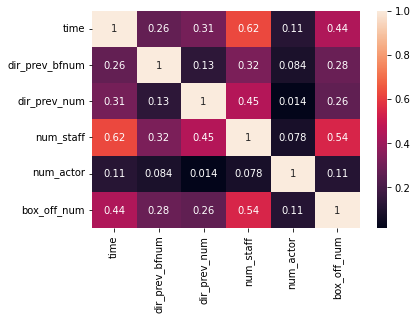

In [39]:
#heatmap() : 시각적 값 확인
sns.heatmap(train.corr(), annot = True)

## 3. 데이터 전처리
## Data Cleansing & Pre-Processing  

### pd.Series.isna()
- 결측치 여부를 확인해줍니다.
- 결측치면 True, 아니면 False

In [41]:
#결측값 여부 확인
train.isna().sum() / 600
#.sum() : False = 0, True = 1 로 더해줌
#/총데이터수 로 %구하기

title            0.0
distributor      0.0
genre            0.0
release_time     0.0
time             0.0
screening_rat    0.0
director         0.0
dir_prev_bfnum   0.6
dir_prev_num     0.0
num_staff        0.0
num_actor        0.0
box_off_num      0.0
dtype: float64

In [42]:
#일정 컬럼에 결측값이 있는 행들만 출력
train[train['dir_prev_bfnum'].isna()]['dir_prev_num']
#.isna()]['dir_prev_num'] : 한 컬럼에 접근

0      0
6      0
8      0
9      0
10     0
      ..
593    0
594    0
597    0
598    0
599    0
Name: dir_prev_num, Length: 330, dtype: int64

### pd.DataFrame.fillna()
- 결측치를 채우고자 하는 column과 결측치를 대신하여 넣고자 하는 값을 명시해주어야 합니다.
- 범주형 변수일 경우, 최빈값으로 대체할 수 있습니다. 

In [47]:
#결측값에 0넣고 inplace Ture로 저장
train['dir_prev_bfnum'].fillna(0, inplace = True)

In [49]:
train.isna().sum()

title             0
distributor       0
genre             0
release_time      0
time              0
screening_rat     0
director          0
dir_prev_bfnum    0
dir_prev_num      0
num_staff         0
num_actor         0
box_off_num       0
dtype: int64

In [51]:
test['dir_prev_bfnum'].fillna(0, inplace = True)

## 4. 변수 선택 및 모델 구축
## Feature Engineering & Initial Modeling  

In [ ]:
X (상영 시간, 영화 제작에 참여한 스태프 수, 배우 수, ...) -> MODEL -> y (영화 관객 수)

In [52]:
#random_state : 똑같은 결과물 산출
#n_estimators : 순차적으로 만들 모델 갯수
model = lgb.LGBMRegressor(random_state=777, n_estimators=1000)

In [53]:
features = ['time', 'dir_prev_num', 'num_staff', 'num_actor']
target = ['box_off_num']

In [54]:
X_train, X_test, y_train = train[features], test[features], train[target]

## 5. 모델 학습 및 검증
## Model Tuning & Evaluation

### a. lightGBM (base model)
### b. k-fold lightGBM (k-fold model)
### c. feature engineering (fe)
### d. grid search (hyperparameter tuning)

## LightGBM

- 부스팅 모델
- 기존 모델이 못 맞춘 문제에 가중치를 두어 지속적으로 학습 이어나감
- 타 부스팅 모델에 비해 속도가 빠름

![부스팅](https://quantdare.com/wp-content/uploads/2016/04/bb3.png)

In [55]:
#학습시키기
model.fit(X_train, y_train)

LGBMRegressor(n_estimators=1000, random_state=777)

In [56]:
#답안지 저장
singleGBM = submission.copy()

In [57]:
singleGBM.head()

,title,box_off_num
0,용서는 없다,0
1,아빠가 여자를 좋아해,0
2,하모니,0
3,의형제,0
4,평행 이론,0


In [58]:
#값 예측하기
singleGBM['box_off_num'] = model.predict(X_test)

In [59]:
#csv 파일로 저장
singleGBM.to_csv('singleGBM.csv', index = False)

## k-fold 교차검증 (k-fold cross validation)

- 과대적합 방지
- 모델 간 일반적인 성능 비교
- validation set, development set

![교차검증](https://mblogthumb-phinf.pstatic.net/MjAxOTA3MjVfMTYz/MDAxNTY0MDY1ODk4NTM0.HiTh5fw3_Fulbq6dv1iLrxS7EmEM4htsWC-5fh-TiGAg.5rbp2nHtWYOZvzoN-Kl4mCKF4nZ4rd5bmO_IDh-sieAg.PNG.ckdgus1433/image.png?type=w800)

In [60]:
from sklearn.model_selection import KFold

In [61]:
#5등분으로 나누기
#shuffle : 순서 섞기
k_fold = KFold(n_splits=5, shuffle=True, random_state=777)

In [62]:
#모델 초기화
model = lgb.LGBMRegressor(random_state=777, n_estimators=1000)

#모델 5개 넣을 리스트 생성
models = []

#5등분으로 나눠진 인덱스 값들로 
for train_idx, val_idx in k_fold.split(X_train):
    x_t = X_train.iloc[train_idx]
    y_t = y_train.iloc[train_idx]
    x_val = X_train.iloc[val_idx]
    y_val = y_train.iloc[val_idx]

    #eval_set : 일정 수준을 평가
    #early_stopping_rounds : 일정 수준에 도달하면 멈추기 (과적합 방지)
    #verbose=100 : 100번째 모델마다 출력
    models.append(model.fit(x_t, y_t, eval_set = (x_val, y_val), early_stopping_rounds=100, verbose=100))

/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	valid_0's l2: 2.70572e+12
[100]	valid_0's l2: 3.90847e+12
[100]	valid_0's l2: 3.50344e+12
[100]	valid_0's l2: 1.45977e+12
[100]	valid_0's l2: 1.77214e+12


In [63]:
#예측한 값을 저장하고 출력
preds = []
for model in models:
    preds.append(model.predict(X_test))
len(preds)

5

In [67]:
#답안지 저장
kfoldLightGBM = submission.copy()

In [65]:
import numpy as np

In [68]:
#축 0으로 두고 평균내기
kfoldLightGBM['box_off_num'] = np.mean(preds, axis = 0)

In [69]:
kfoldLightGBM.head()

,title,box_off_num
0,용서는 없다,3367422.1
1,아빠가 여자를 좋아해,961138.9
2,하모니,1097929.7
3,의형제,2097270.8
4,평행 이론,781476.3


In [70]:
#파일로 저장
kfoldLightLGBM.to_csv('kfoldLightLGBM.csv', index = False)

## feature engineering

In [79]:
features

['time', 'dir_prev_num', 'num_staff', 'dir_prev_bfnum', 'genre']

In [78]:
train.columns

Index(['title', 'distributor', 'genre', 'release_time', 'time',
       'screening_rat', 'director', 'dir_prev_bfnum', 'dir_prev_num',
       'num_staff', 'num_actor', 'box_off_num'],
      dtype='object')

In [81]:
train.genre

0      10
1       2
2      10
3      11
4      11
       ..
595     4
596     4
597     1
598     2
599    10
Name: genre, Length: 600, dtype: int64

In [86]:
#LabelEncoder() : 문자열을 숫자로 변경
#fit_transform() : 어떤 숫자로 변경할 지 지정
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
train['genre'] = le.fit_transform(train['genre'])

In [87]:
#test셋의 장르 컬럼의 문자열도 숫자로 변경
test['genre'] = le.transform(test['genre'])

In [83]:
features = ['time', 'dir_prev_num', 'num_staff', 'dir_prev_bfnum', 'genre']

In [84]:
X_train, X_test, y_train = train[features], test[features], train[target]

In [88]:
#학습 진행
model = lgb.LGBMRegressor(random_state=777, n_estimators=1000)

models = []

for train_idx, val_idx in k_fold.split(X_train):
    x_t = X_train.iloc[train_idx]
    y_t = y_train.iloc[train_idx]
    x_val = X_train.iloc[val_idx]
    y_val = y_train.iloc[val_idx]

    models.append(model.fit(x_t, y_t, eval_set=(x_val, y_val), early_stopping_rounds=100, verbose = 100))

/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	valid_0's l2: 2.75861e+12
[100]	valid_0's l2: 4.39277e+12
[100]	valid_0's l2: 3.29612e+12
[100]	valid_0's l2: 1.63913e+12
[100]	valid_0's l2: 1.48502e+12


In [91]:
#예측 진행
preds = []
for model in models:
    preds.append(model.predict(X_test))
len(preds)

5

In [92]:
#새로운 답안지 저장
feLightGBM = submission.copy()

In [93]:
#평균값 저장
feLightGBM['box_off_num'] = np.mean(preds, axis = 0)

In [94]:
#파일 저장
feLightGBM.to_csv('feLightGBM.csv', index = False)

## Grid Search

![그리드서치](https://trello-attachments.s3.amazonaws.com/5e0d387cd4f8ba5e8f790d8b/5e634450ee4a88284a40a05a/3e9490f6010aa32e74bfde07398ac603/image.png)

In [95]:
from sklearn.model_selection import GridSearchCV

In [98]:
model = lgb.LGBMRegressor(random_state=777, n_estimators=100)

#파라미터 3X2 조합
params = {
    'learning_rate': [0.1, 0.01, 0.003],
    'min_child_samples': [20, 30]}

#객체 만들기
gs = GridSearchCV(estimator=model,
                  param_grid=params,
                  scoring='neg_mean_squared_error',
                  cv = k_fold)

In [99]:
#학습
gs.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=777, shuffle=True),
             estimator=LGBMRegressor(random_state=777),
             param_grid={'learning_rate': [0.1, 0.01, 0.003],
                         'min_child_samples': [20, 30]},
             scoring='neg_mean_squared_error')

In [100]:
#가장 좋았던 조합 확인
gs.best_params_

{'learning_rate': 0.01, 'min_child_samples': 30}

In [101]:
#모델 학습
model = lgb.LGBMRegressor(random_state=777, n_estimators=1000, learning_rate=0.003, min_child_samples=30)

models = []

for train_idx, val_idx in k_fold.split(X_train):
    x_t = X_train.iloc[train_idx]
    y_t = y_train.iloc[train_idx]
    x_val = X_train.iloc[val_idx]
    y_val = y_train.iloc[val_idx]

    models.append(model.fit(x_t, y_t, eval_set=(x_val, y_val), early_stopping_rounds=100, verbose = 100))

/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	valid_0's l2: 2.56675e+12
[200]	valid_0's l2: 2.45572e+12
[300]	valid_0's l2: 2.42741e+12
[400]	valid_0's l2: 2.43533e+12
[100]	valid_0's l2: 4.89194e+12
[200]	valid_0's l2: 4.40979e+12
[300]	valid_0's l2: 4.19078e+12
[400]	valid_0's l2: 4.05833e+12
[500]	valid_0's l2: 3.96851e+12
[600]	valid_0's l2: 3.9144e+12
[700]	valid_0's l2: 3.8814e+12
[800]	valid_0's l2: 3.8742e+12
[900]	valid_0's l2: 3.87414e+12
[100]	valid_0's l2: 3.14433e+12
[200]	valid_0's l2: 2.79195e+12
[300]	valid_0's l2: 2.59061e+12
[400]	valid_0's l2: 2.46554e+12
[500]	valid_0's l2: 2.38703e+12
[600]	valid_0's l2: 2.34024e+12
[700]	valid_0's l2: 2.31752e+12
[800]	valid_0's l2: 2.33903e+12
[100]	valid_0's l2: 1.60586e+12
[200]	valid_0's l2: 1.40196e+12
[300]	valid_0's l2: 1.29919e+12
[400]	valid_0's l2: 1.25076e+12
[500]	valid_0's l2: 1.23338e+12
[600]	valid_0's l2: 1.23041e+12
[700]	valid_0's l2: 1.22152e+12
[800]	valid_0's l2: 1.22439e+12
[100]	valid_0's l2: 1.96089e+12
[200]	valid_0's l2: 1.75452e+12
[300]	valid

In [104]:
#예측
preds = []
for model in  models:
    preds.append(model.predict(X_test))

In [107]:
#답안지 복사
gslgbm = submission.copy()

In [108]:
gslgbm['box_off_num'] = np.mean(preds, axis = 0)

In [109]:
gslgbm.to_csv('gslgbm.csv', index = False)